# 0. 들어가기

데이터 분석은 크게 **세 단계**로 진행됩니다.

1. **데이터 탐색**  
   데이터를 불러오고, 구조와 크기를 확인합니다.  

2. **기초 통계로 요약**  
   평균, 중앙값, 최댓값, 최솟값 같은 수치로 데이터를 간단히 요약합니다.  

3. **시각화**  
   히스토그램, 박스플롯 같은 그래프를 통해 데이터를 직관적으로 이해합니다.  

이러한 과정 전체를 **EDA(Exploratory Data Analysis, 탐색적 데이터 분석)** 라고 합니다.  
EDA는 데이터를 처음 접했을 때 숨겨진 패턴을 찾고, 이상치를 확인하며, 가설을 세우는 데 중요한 단계입니다.

이번 수업에서는 `Pandas`로 데이터를 다루고, `Matplotlib`와 `Seaborn`으로 시각화하는 방법을 배웁니다.

# 1. 데이터 준비 & Pandas 기초

## 1.1 Pandas란?
- 파이썬에서 데이터를 표(table) 형태로 다루는 라이브러리
- **엑셀과 비슷한 DataFrame**을 제공
- 데이터 탐색, 전처리, 분석의 표준 도구

```python
import pandas as pd
```

In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
titanic = pd.read_csv(url)

In [3]:
print(titanic.shape)

(891, 11)


In [4]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# 데이터 정렬

In [8]:
titanic.sort_values("age").head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
803,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


In [9]:
titanic.sort_values('fare', ascending=False).head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
88,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
438,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [10]:
titanic.sort_values('fare', ascending=True).head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
815,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S
806,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
413,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
481,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S


In [11]:
# 데이터 인덱싱

In [12]:
titanic.loc[titanic['survived']==1].head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [13]:
titanic.loc[titanic['age']==22, 'survived']

0      0
60     0
80     0
112    0
141    1
151    1
212    0
225    0
243    0
287    0
289    1
320    0
323    1
356    1
373    0
376    1
395    0
474    0
478    0
521    0
539    1
553    1
554    1
588    0
608    1
708    1
882    0
Name: survived, dtype: int64

In [14]:
titanic.iloc[0]

survived                          0
pclass                            3
name        Braund, Mr. Owen Harris
sex                            male
age                            22.0
sibsp                             1
parch                             0
ticket                    A/5 21171
fare                           7.25
cabin                           NaN
embarked                          S
Name: 0, dtype: object

In [15]:
titanic.iloc[0:1]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [16]:
print(titanic['age'].head())

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64


In [17]:
# 데이터 수정 / 추가

In [18]:
titanic['age_group'] = (titanic['age'] // 10) * 10
titanic.head()
titanic[['age', 'age_group']].head()

,age,age_group
0,22.0,20.0
1,38.0,30.0
2,26.0,20.0
3,35.0,30.0
4,35.0,30.0


### ✅ 체크포인트
- `pd.read_csv()` 로 CSV 파일을 불러와 DataFrame을 만든다.  
- `shape`, `columns`, `head()`, `tail()` 로 데이터 구조를 빠르게 파악한다.  
- `info()`, `describe()` 로 데이터 타입과 통계 요약을 확인할 수 있다.  
- `sort_values()` 로 정렬, `loc[]`와 `iloc[]`로 인덱싱한다.  
- 새로운 열을 추가하거나 값 수정이 가능하다.

# 2. 기술 통계 기초

## 2.1 데이터의 종류
- **수치형 데이터 (Numerical)**  
  → 숫자로 된 데이터 (예: 나이, 요금, 대여량)  

- **범주형 데이터 (Categorical)**  
  → 그룹/범주를 나타내는 데이터 (예: 성별, 클래스, 요일)

  ## 2.2 대표값 (중심 경향)
데이터를 대표하는 값들

- **평균 (mean)**: 모든 값을 더한 뒤 개수로 나눔  
- **중앙값 (median)**: 데이터를 크기순으로 정렬했을 때 한가운데 값  
- **최빈값 (mode)**: 가장 많이 등장하는 값

In [19]:
print(titanic['age'].median())
print(f'{titanic['age'].mean():.2f}')
print(titanic['age'].mode())

28.0
29.70
0    24.0
Name: age, dtype: float64


## 2.3 범위와 분포
데이터의 퍼짐 정도를 나타내는 값들

- **최소값 (min)**, **최대값 (max)**  
- **사분위수 (quantile)**  
  - 데이터를 4등분한 구간의 경계  
  - 25%, 50%(=중앙값), 75% 지점  
- **분산 (variance)**: 데이터가 평균에서 얼마나 떨어져 있는지  
- **표준편차 (std)**: 분산의 제곱근 → 데이터의 흩어진 정도  

In [20]:
print(titanic['age'].min())
print(titanic['age'].max())
print(titanic['age'].quantile([0.25, 0.5, 0.75]))
print(titanic['age'].std())

0.42
80.0
0.25    20.125
0.50    28.000
0.75    38.000
Name: age, dtype: float64
14.526497332334042


In [21]:
titanic.describe(include='all')

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_group
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,714.000000
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,NaN
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S,NaN
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,NaN
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,25.252101
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,14.970969
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,20.000000
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,20.000000
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,30.000000


# 3. 데이터 시각화 기본 (Matplotlib & Seaborn)



## 3.1 Matplotlib & Seaborn 소개
- **Matplotlib**: 파이썬의 가장 기본적인 시각화 라이브러리  
- **Seaborn**: Matplotlib 기반으로, 통계 시각화에 특화된 라이브러리

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

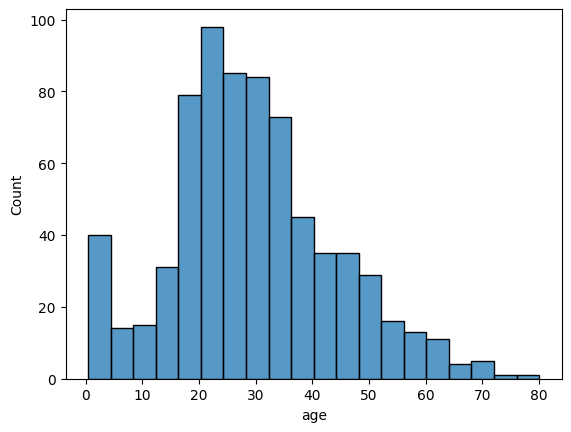

In [23]:
sns.histplot(titanic['age'].dropna(), bins=20, kde=False)
plt.show()

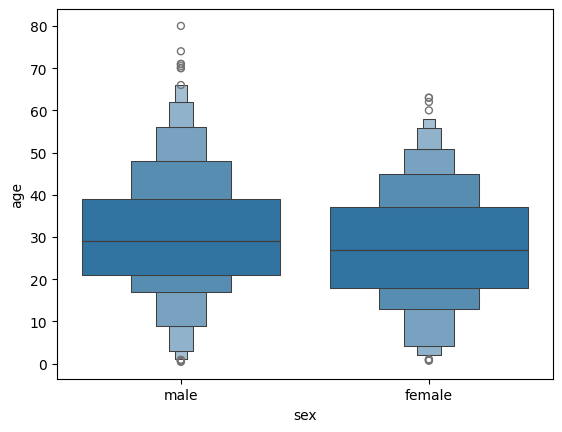

In [24]:
sns.boxenplot(x='sex', y='age', data=titanic)
plt.show()

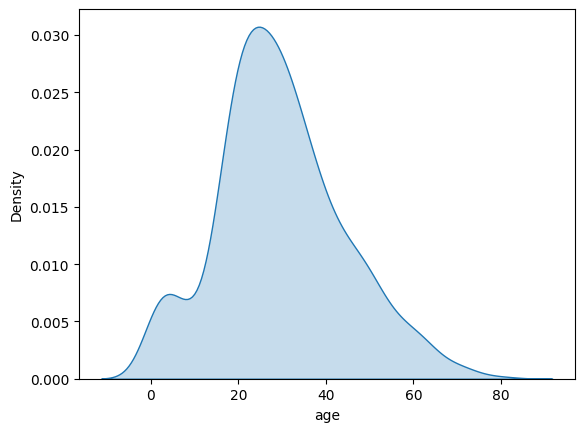

In [25]:
sns.kdeplot(titanic['age'].dropna(), fill=True)
plt.show()

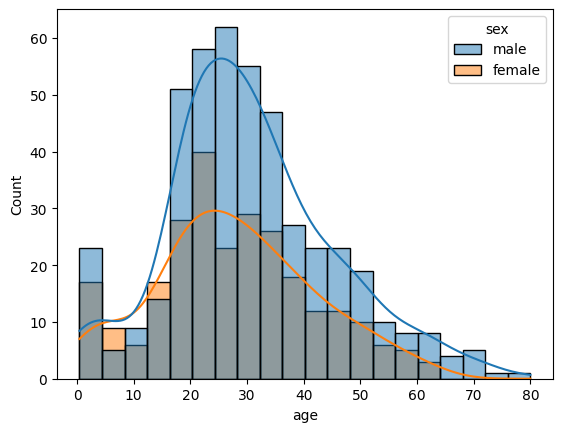

In [26]:
sns.histplot(data=titanic, x='age', hue='sex', bins=20, kde=True)
plt.show()

# 4. 다양한 데이터 분포 살펴보기

## 4.1 정규분포 (Normal Distribution)
- 데이터가 **종 모양(bell curve)**으로 퍼져 있는 분포  
- 평균을 중심으로 대칭  
- 많은 자연현상과 사회현상에서 나타나는 가장 중요한 분포  

예: 사람의 키, 시험 점수

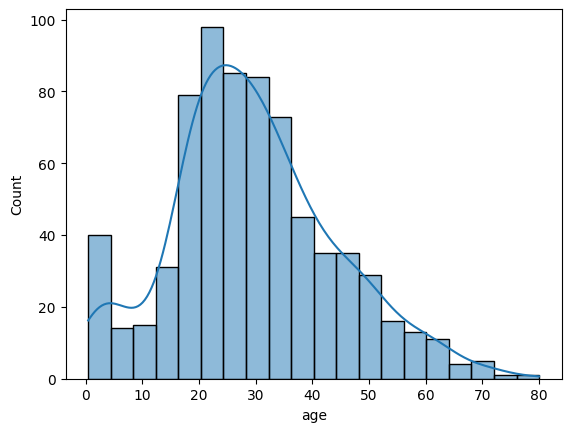

In [27]:
sns.histplot(titanic['age'].dropna(), kde=True)
plt.show()

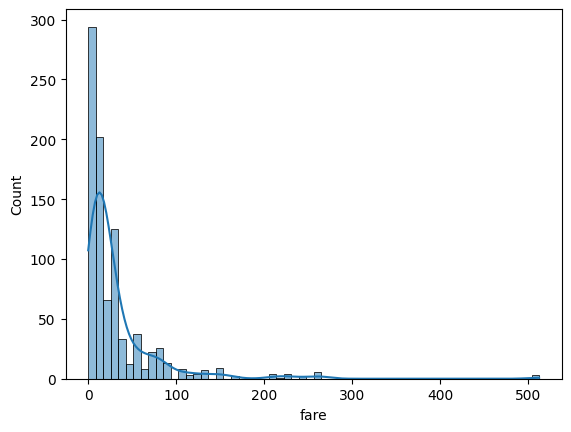

In [28]:
sns.histplot(titanic['fare'].dropna(), kde=True)
plt.show()

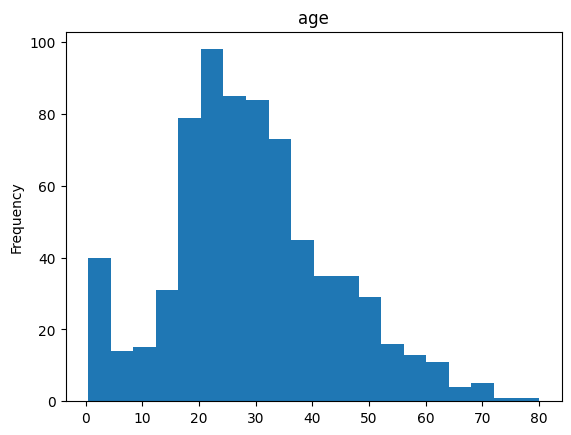

In [29]:
titanic['age'].plot(kind='hist', bins=20, title='age')
plt.show()

## 5.3 그룹별 집계와 시각화
- `groupby()`로 데이터를 그룹화하고 요약 통계 계산
- 그 결과를 시각화와 연결

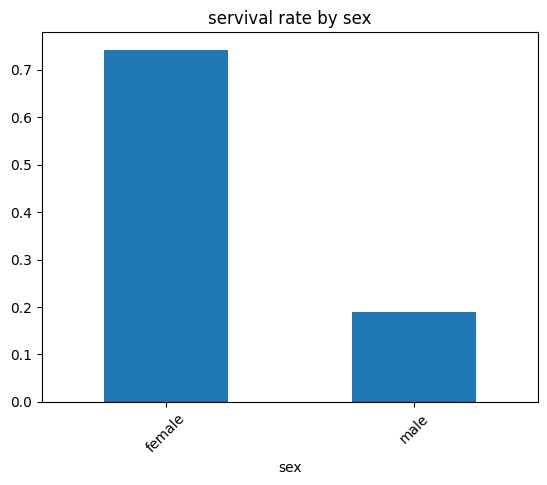

In [30]:
survival_rate = titanic.groupby('sex')['survived'].mean()
survival_rate.plot(kind='bar', title='servival rate by sex')
plt.xticks(rotation=45)
plt.show()

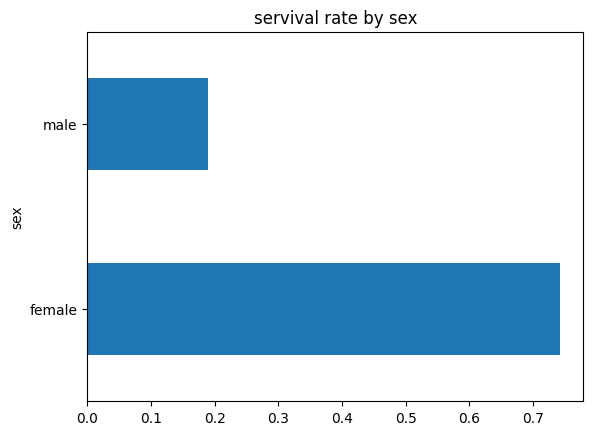

In [31]:
survival_rate = titanic.groupby('sex')['survived'].mean()
survival_rate.plot(kind='barh', title='servival rate by sex')
plt.show()

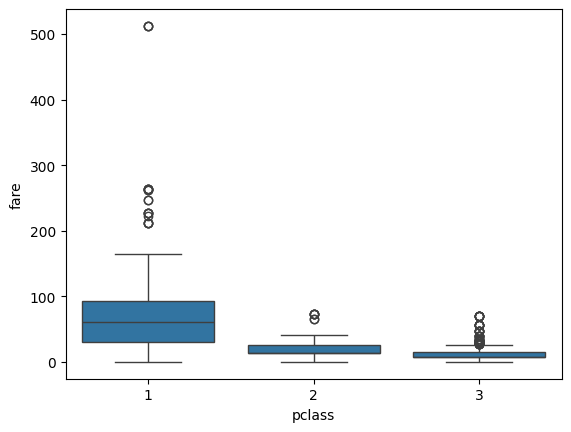

In [32]:
sns.boxplot(x='pclass', y='fare', data=titanic)
plt.show()